In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix



In [17]:
#Cargamos el Dataset
df = pd.read_csv('C:/Users/Fer/Documents/Fernando/archivospython/zoo.csv', sep=',')
#Visualizamos el Dataset
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [18]:
df.shape

(101, 18)

In [26]:
#Borramos variable de nnombre ya uqe no es relevante para la clasificacion
df=df.drop('animal_name', axis=1)
#Separamos variable target del resto del dataset
x = df.drop('class_type', axis=1)
y = df['class_type']
print(x.head(2))
print(y.head(2))

   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone   
0     1         0     0     1         0        0         1        1         1  \
1     1         0     0     1         0        0         0        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  
0         1         0     0     4     0         0        1  
1         1         0     0     4     1         0        1  
0    1
1    1
Name: class_type, dtype: int64


In [32]:
#Divido Dataset de training y Test
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(x_train.shape)
print(y_test.shape)

(70, 16)
(31,)


In [33]:
#Parametros de ejecucion
mlp = MLPClassifier(max_iter=500, activation='relu')
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [34]:
#Entrenamos modelo
mlp.fit(x_train,y_train)


MLPClassifier(max_iter=500)

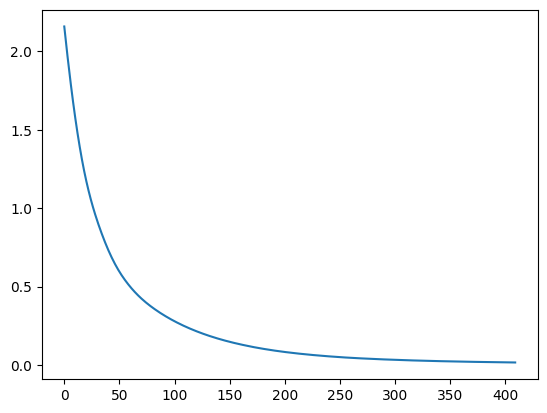

In [35]:
# Grafico la curva de perdida
import matplotlib.pyplot as plt
plt.plot(mlp.loss_curve_)
plt.show()

In [36]:
#PRedecimos con dataset de test
pred = mlp.predict(x_test)
pred

array([7, 6, 1, 1, 5, 5, 7, 3, 1, 4, 1, 6, 1, 4, 6, 4, 1, 1, 2, 2, 7, 3,
       1, 2, 4, 1, 7, 2, 1, 6, 1], dtype=int64)

In [39]:
#Metricas de Evaluacion
confusion_matrix(y_test,pred)

array([[11,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  3],
       [ 0,  0,  1,  0,  0,  0,  1]], dtype=int64)

In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         4
           3       0.50      0.50      0.50         2
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         2
           6       1.00      0.57      0.73         7
           7       0.25      0.50      0.33         2

    accuracy                           0.84        31
   macro avg       0.79      0.80      0.77        31
weighted avg       0.90      0.84      0.85        31

